# Exemple d'utilisation de la classe corrélation
La classe utilise 5 packages : 
* numpy
* pandas
* matplotlib.pyplot
* seaborn 
* alive_progress

Pour construire la classe, il faut lui donner deux arguments obligatoires que sont 
* atoms : pandas dataframe de 4 colonnes comportant le numéro de cycle, et les temps et positions d'arrivée des atomes. Les colonnes devront s'appeler "Cycle" ; "X" ; "Y" et "T".
* n_cycles : le nombre de fichiers / cycles.

Dans la première méthode __init__ appelée, plusieurs attributs sont définis. Tous ces attributs peuvent être modifié en les donnant comme argument lors de la construction de la classe. Parmi ces attributs, on retiendra :
* boxes : dictionnaire donnant position et taille des boîtes 1 et 2 pour les corrélations.
        Forme : { "1": {"Vx": {"size": 10, "position": 0},
                        "Vy": {"size": 3, "position": 0},
                        "Vz": {"size": 0.9, "position": 56},   },
                "2": {  "Vx": {"size": 10, "position": 0},
                        "Vy": {"size": 3, "position": 0},
                        "Vz": {"size": 0.9, "position": 80},   },}
* ROI : dictionnaire, Region Of Interest --> définir une ROI adaptée permet de réduire la taille des dataframe utilisés (en mm/s)
        Format : {"Vx": {"max":120, "min":-120}, "Vx:{"max":20, "min":-20}}
* ROD : dictionnaire, Region Of Desinterest,  pour ne sélectionner que les atomes en dehors de la ROD. Même remarque que pour ROI et même format. Cela sera utilie pour les manips type DCE.

* bec_arrival_time : float, temps d'arrivée du condensat en ms

* raman_kick : float, kick raman en mm/s (toutes les vitesses selon Xsont décalé de raman_kick




In [4]:
from correlations import Correlation, Variable
from correlations import load_data_for_correlation
from pathlib import Path


In [5]:
root = "/mnt/manip_E"
day = "2022/05/02"
sequence = "095"
"""
root = "E:"
day = "2022/04/26"
sequence = "024"
"""
folder = Path(f"{root}/{day}/{sequence}")
N_files, data = load_data_for_correlation(folder)
# Je gicle tous les atomes dont les temps d'arrivée son inférieur à 310
data = data[data["T"]>310]

Data are loaded


<Figure size 432x288 with 0 Axes>

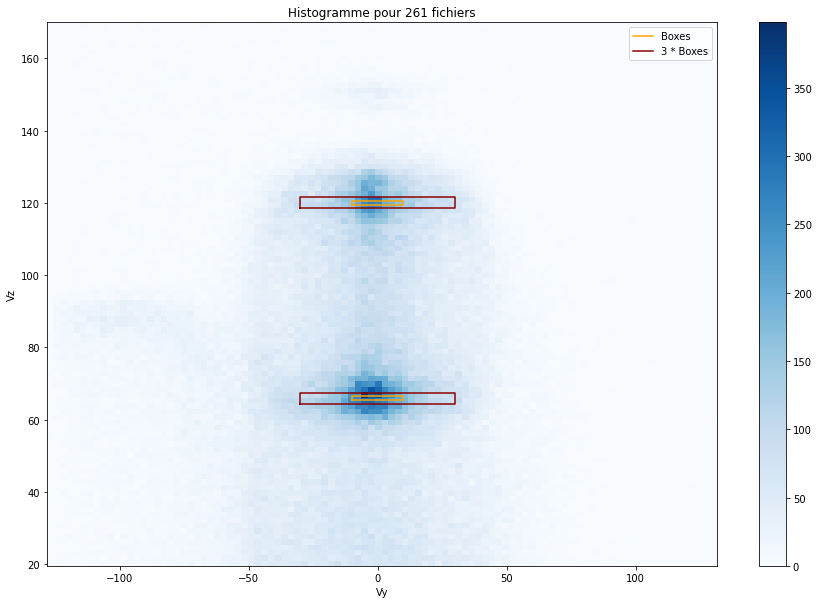

<Figure size 432x288 with 0 Axes>

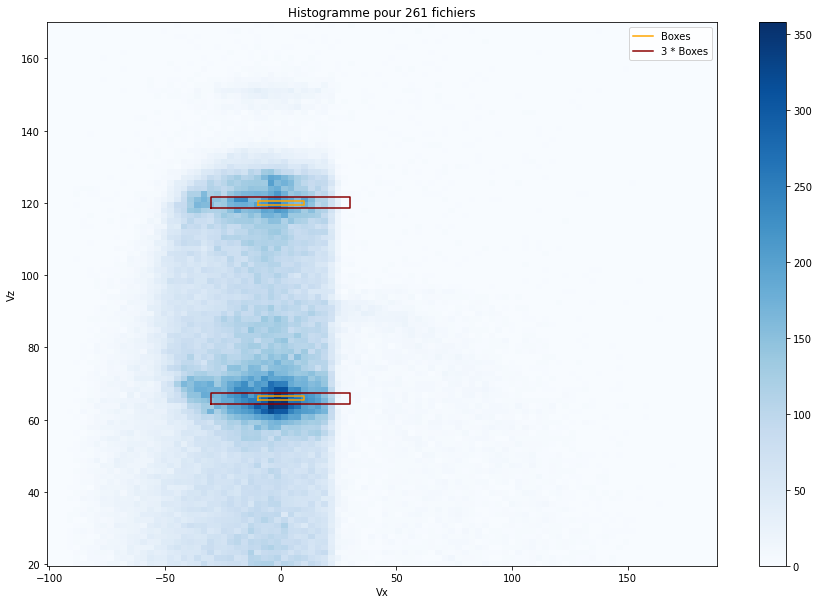

In [25]:
################################################################
############ INSTANCIATION DE LA CLASSE CORRÉLATION ############
## On regarde si nos boîtes sont bien choisies en utilisant la 
## méthode show_density. Ci-dessous, tout
################################################################
n_cycles = N_files
raman_kick = 42 #mettre à zéro pour comparer avec Quentin. --> mais attention aux boîtes dans ce cas
ROI = {"Vz": {"max": 170, "min": 10}}
boxes = {
    "1": {
        "Vx": {"size": 10, "position": 0},
        "Vy": {"size": 10, "position": 0},
        "Vz": {"size": 0.5, "position": 66},
    },
    "2": {
        "Vx": {"size": 10, "position": 0},
        "Vy": {"size": 10, "position": 0},
        "Vz": {"size":0.5, "position": 120},
    },
}
corr = Correlation(data, n_cycles, ROI=ROI, boxes=boxes, raman_kick = raman_kick)
a=corr.show_density(nameX="Vy")
a=corr.show_density(nameX="Vx")

## Scanner des corrélations
Bon l'intérêt du programme est de scanner un paramètre, par exemple le centre d'une boîte. Pour cela, il faut définir quelles sont les variables scannées. On a le chiox de définir deux variables (qui sont des objets de la classe variable).
### Objet Variable
Il s'agit d'un objet assez simple dont les attributs permettent de savoir quel boîte nous scannons, on les "crée" en appelant la méthode define_variable et il faut leur définir leur
* box :"1" ou "2" selon que la quantité que l'on scanne concerne la boîte 1 ou 2,
* type : "position" ou "size", selon que ce que l'on veut varier est la taille ou la position de la boîte,
* name : "Vz1" par exemple si on scanne Vz dans la boîte 1. Il faut que le nom des deux paramètres scannés soit différent.
* les valeurs qu'elle vont prendre aka 
    * min, 
    * max 
    * step la taille du pas à prendre.
    
   -->  on peut aussi leur donner à la place un argument __values__ qui est la liste des valeurs qu'elles doivent prendre.


In [26]:
corr.define_variable1(
    box="1", axe="Vz", type="position", name="Vz1", min=30, max=145, step=1
)
corr.define_variable2(
    box="2", axe="Vz", type="position", name="Vz2", min=30, max=145, step=1
)

# corr.show_2D_plot(self, x, y, z="g^2")
corr.compute_correlations()


Gathering Vz2: 100%|██████████| 115/115 [00:00<00:00, 190.69it/s]


Computation is done.


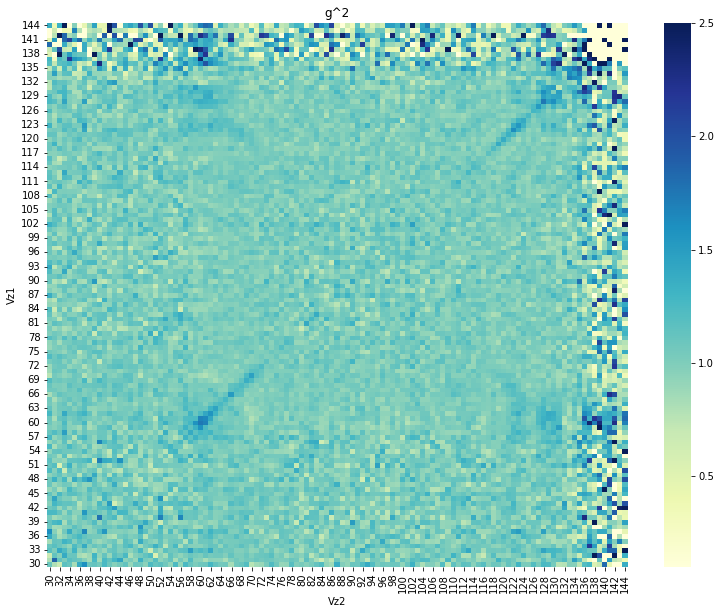

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
x="Vz1"
y="Vz2"
z="g^2"
df_pivoted_correlations = corr.result.pivot(index=x, columns=y, values=z)
fig, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(
    df_pivoted_correlations,
    cmap="YlGnBu",
    ax=ax,
    vmin=0.1,
    vmax=2.5,
)
ax.invert_yaxis()
plt.title(z)
plt.show()

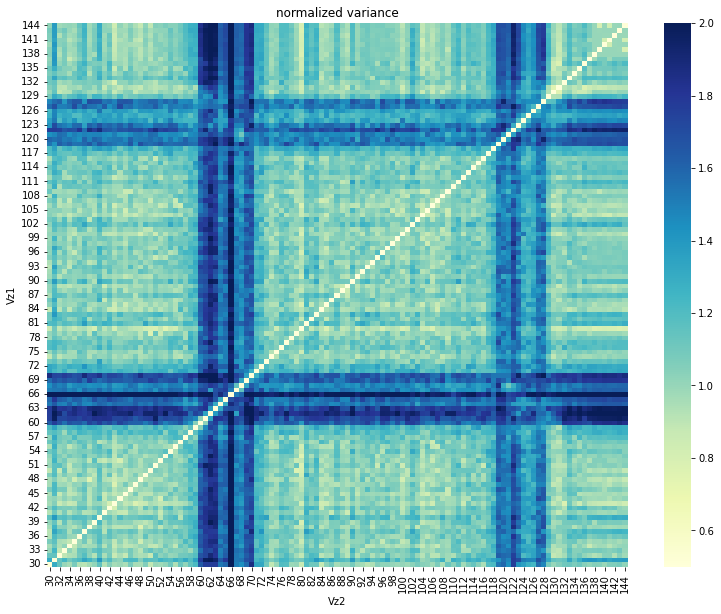

In [28]:
x="Vz1"
y="Vz2"
z="normalized variance"
df_pivoted_correlations = corr.result.pivot(index=x, columns=y, values=z)
fig, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(
    df_pivoted_correlations,
    cmap="YlGnBu",
    ax=ax,
    vmin=0.5,
    vmax=2,
)
ax.invert_yaxis()
plt.title(z)
plt.show()

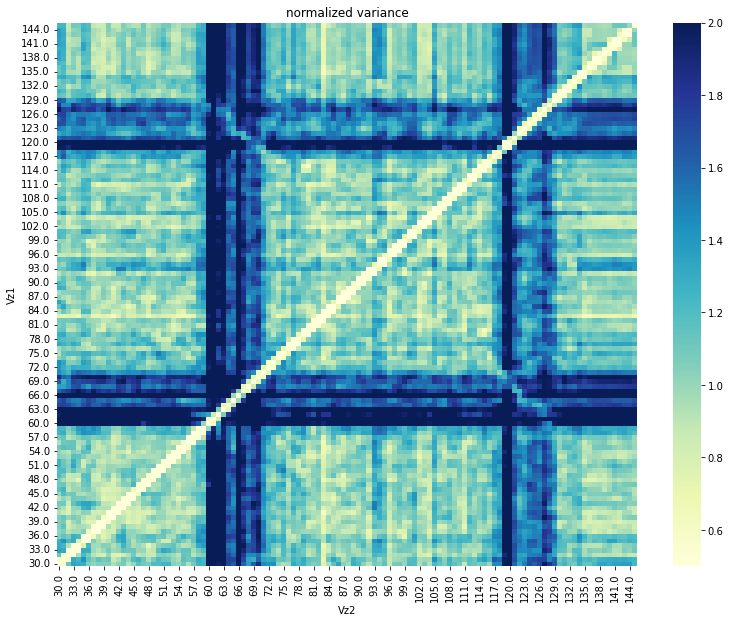

In [12]:
x="Vz1"
y="Vz2"
z="normalized variance"
df_pivoted_correlations = corr.result.pivot(index=x, columns=y, values=z)
fig, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(
    df_pivoted_correlations,
    cmap="YlGnBu",
    ax=ax,
    vmin=0.5,
    vmax=2,
)
ax.invert_yaxis()
plt.title(z)
plt.show()

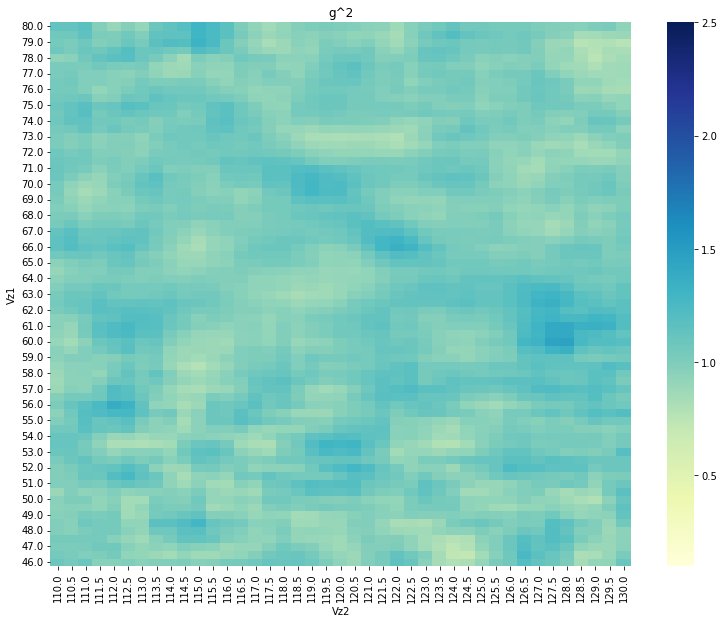

In [14]:
boxes = {
    "1": {
        "Vx": {"size": 10, "position": 0},
        "Vy": {"size": 10, "position": 0},
        "Vz": {"size": 1, "position": 56},
    },
    "2": {
        "Vx": {"size": 10, "position": 0},
        "Vy": {"size": 10, "position": 0},
        "Vz": {"size":1, "position": 130},
    },
}

corr.boxes = boxes
corr.define_variable1(
    box="1", axe="Vz", type="position", name="Vz1", min=46, max=80, n_step=69
)
corr.define_variable2(
    box="2", axe="Vz", type="position", name="Vz2", min=110, max=130, n_step=41
)

# corr.show_2D_plot(self, x, y, z="g^2")
corr.compute_correlations()
import seaborn as sns

x="Vz1"
y="Vz2"
z="g^2"
df_pivoted_correlations = corr.result.pivot(index=x, columns=y, values=z)
fig, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(
    df_pivoted_correlations,
    cmap="YlGnBu",
    ax=ax,
    vmin=0.1,
    vmax=2.5,
)
ax.invert_yaxis()
plt.title(z)
plt.show()

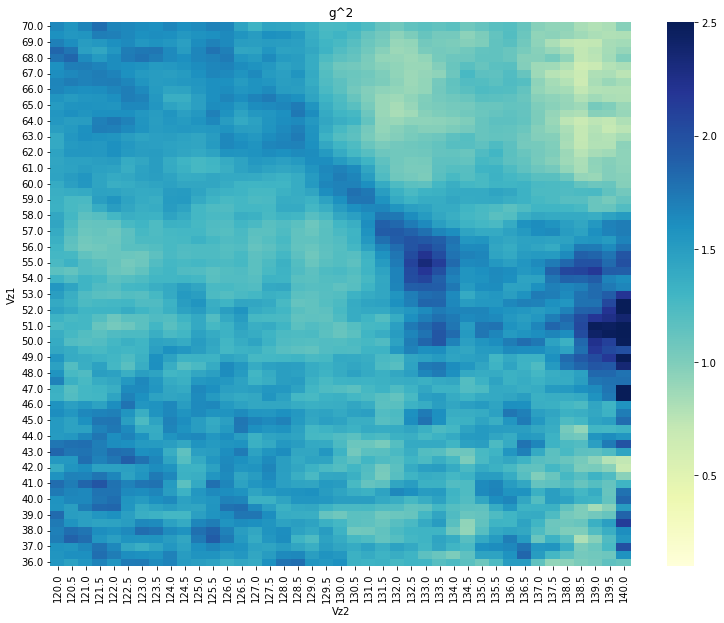

In [81]:
boxes = {
    "1": {
        "Vx": {"size": 7, "position": 0},
        "Vy": {"size": 7, "position": 0},
        "Vz": {"size": 0.5, "position": 56},
    },
    "2": {
        "Vx": {"size": 7, "position": 0},
        "Vy": {"size": 7, "position": 0},
        "Vz": {"size":0.5, "position": 130},
    },
}

corr.boxes = boxes
corr.define_variable1(
    box="1", axe="Vz", type="position", name="Vz1", min=36, max=70, n_step=69
)
corr.define_variable2(
    box="2", axe="Vz", type="position", name="Vz2", min=120, max=140, n_step=41
)

# corr.show_2D_plot(self, x, y, z="g^2")
corr.compute_correlations()
import seaborn as sns

x="Vz1"
y="Vz2"
z="g^2"
df_pivoted_correlations = corr.result.pivot(index=x, columns=y, values=z)
fig, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(
    df_pivoted_correlations,
    cmap="YlGnBu",
    ax=ax,
    vmin=0.1,
    vmax=2.5,
)
ax.invert_yaxis()
plt.title(z)
plt.show()

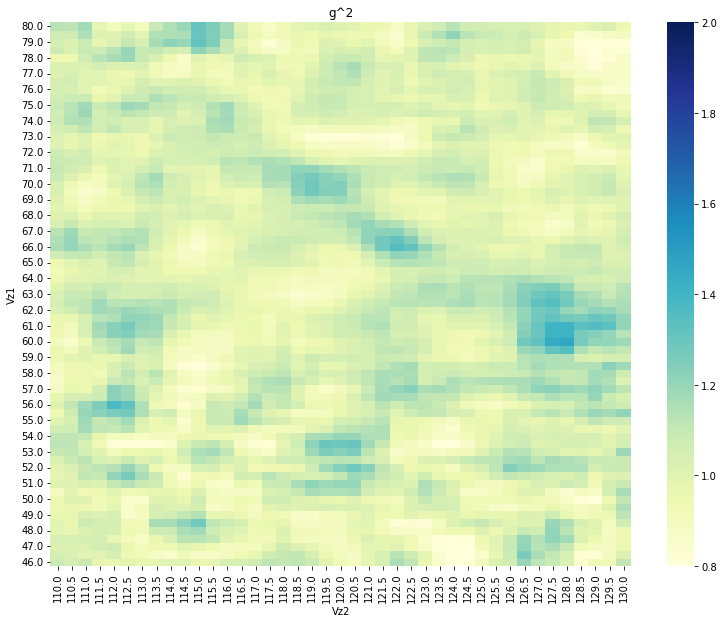

In [17]:
x="Vz1"
y="Vz2"
z="g^2"
df_pivoted_correlations = corr.result.pivot(index=x, columns=y, values=z)
fig, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(
    df_pivoted_correlations,
    cmap="YlGnBu",
    ax=ax,
    vmin=0.8,
    vmax=2,
)
ax.invert_yaxis()
plt.title(z)
plt.show()

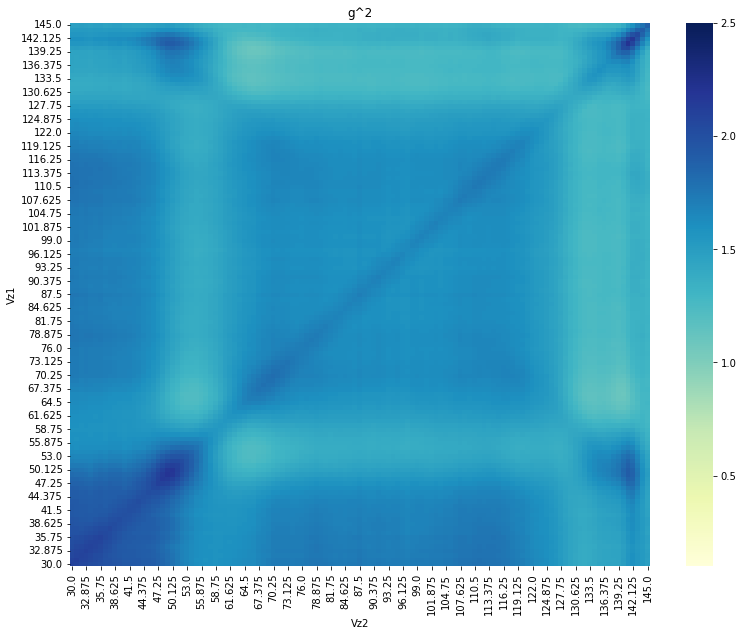

In [83]:
boxes = {
    "1": {
        "Vx": {"size": 32, "position": 0},
        "Vy": {"size": 32, "position": 0},
        "Vz": {"size": 2.8, "position": 56},
    },
    "2": {
        "Vx": {"size": 32, "position": 0},
        "Vy": {"size": 32, "position": 0},
        "Vz": {"size":2.8, "position": 130},
    },
}

corr.boxes = boxes
corr.define_variable1(
    box="1", axe="Vz", type="position", name="Vz1", min=30, max=145, n_step=121
)
corr.define_variable2(
    box="2", axe="Vz", type="position", name="Vz2", min=30, max=145, n_step=121
)

# corr.show_2D_plot(self, x, y, z="g^2")
corr.compute_correlations()
import seaborn as sns

x="Vz1"
y="Vz2"
z="g^2"
df_pivoted_correlations = corr.result.pivot(index=x, columns=y, values=z)
fig, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(
    df_pivoted_correlations,
    cmap="YlGnBu",
    ax=ax,
    vmin=0.1,
    vmax=2.5,
)
ax.invert_yaxis()
plt.title(z)
plt.show()

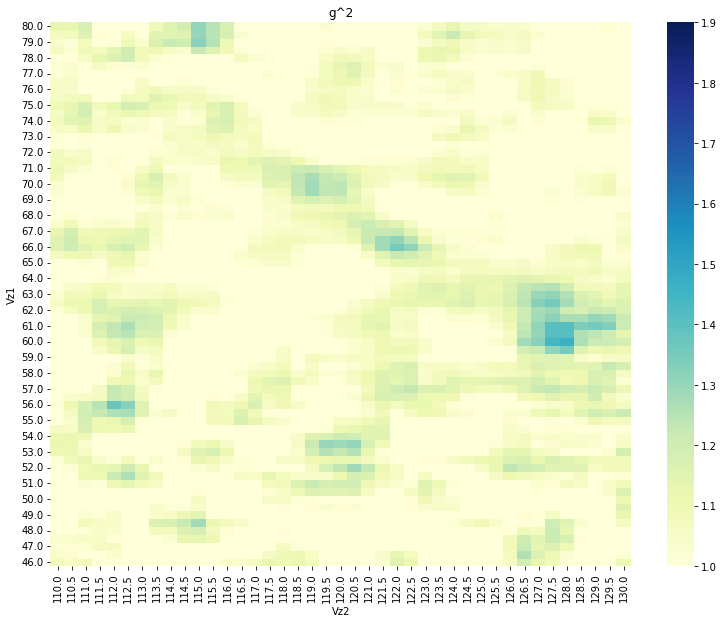

In [18]:

x="Vz1"
y="Vz2"
z="g^2"
df_pivoted_correlations = corr.result.pivot(index=x, columns=y, values=z)
fig, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(
    df_pivoted_correlations,
    cmap="YlGnBu",
    ax=ax,
    vmin=1,
    vmax=1.9,
)
ax.invert_yaxis()
plt.title(z)
plt.show()

In [118]:
#!/usr/bin/env python
# -*- mode:Python; coding: utf-8 -*-

"""
@Author: victor
@Date:   24 April 2022 @ 17:42
@Last modified by:   victor
@Last modified time: 24 April 2022 @ 17:43

Comment : classe pour réaliser des corrélations.
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from alive_progress import alive_bar
from tqdm import tqdm, trange


class CorrelationNotebook2:
    """
    Classe corrélation. Prend en entrée un dataframe avec X, Y et T et calcule de corrélations etc...

    Mandatory parameters
    --------------------
    atoms : pandas dataframe de 4 colonnes comportant le numéro de cycle, et les temps et positions d'arrivée des atomes. Les colonnes devront s'appeler "Cycle" ; "X" ; "Y" et "T".

    n_cycles : le nombre de fichiers / cycles.

    Main attributs
    --------------------
    atoms : pandas dataframe de 4 colonnes comportant le numéro de cycle, et les vitesses des atomes selon les 3 axes Vx, Vy et Vz



    Other attributs
    --------------------
    boxes : dictionnaire donnant position et taille des boîtes 1 et 2 pour les corrélations.
        Forme : { "1": {"Vx": {"size": 10, "position": 0},
                        "Vy": {"size": 3, "position": 0},
                        "Vz": {"size": 0.9, "position": 56},   },
                "2": {  "Vx": {"size": 10, "position": 0},
                        "Vy": {"size": 3, "position": 0},
                        "Vz": {"size": 0.9, "position": 80},   },}

    ROI : dictionnaire, Region Of Interest
        définir une ROI adaptée permet de réduire la taille des dataframe utilisés (en mm/s)
        ATTENTION : l'application de la méthode apply_ROI() agit sur le dataframe atoms donc si vous vous rendez compte que votre ROI est trop petite, il faut recharger le dataframe atoms.
        Format : {"Vx": {"max":120, "min":-120}}

    ROD : dictionnaire, Region Of Desinterest
        pour ne sélectionner que les atomes en dehors de la ROD. Même remarque que pour ROI et même format.

    bec_arrival_time : float, temps d'arrivée du condensat en ms

    raman_kick : float, kick raman en mm/s

    var1 et var2 : objet Variable (cf classe ci-dessous), les paramètres des boîtes que nous allons changer pour faire les corrélations.


    Some Methods
    --------------------
    apply_ROI() / apply_ROD() : select atoms only in ROI / outside ROD.

    define_variable1 / define_variable2 : constructs the variable on which we will compute corrrelations. See Variable class for more infos.

    compute_correlations : construct the result dataframe in which correlations are stored.

    show_density : plot the density of the atoms dataframe

    """

    def __init__(self, atoms, n_cycles, **kwargs):
        """
        Object initialization, sets parameters as the user defined, build the atoms dataframe and apply ROD and ROI.
        """
        self.atoms = atoms.copy()
        self.n_cycles = n_cycles
        self.bec_arrival_time = 308  # temps d'arrivée du BEC, en ms
        self.raman_kick = 42  # mm/s, kick Raman
        self.gravity = 9.81
        self.var1 = None
        self.var2 = None
        self.remove_shot_noise = True
        self.ROI = {}  # Region Of Interest
        self.ROD = {}  # Region Of Desinterest.
        self.boxes = {
            "1": {
                "Vx": {"size": 10, "position": 0},
                "Vy": {"size": 3, "position": 0},
                "Vz": {"size": 0.9, "position": 56},
            },
            "2": {
                "Vx": {"size": 10, "position": 0},
                "Vy": {"size": 3, "position": 0},
                "Vz": {"size": 0.9, "position": 130},
            },
        }
        self.__dict__.update(kwargs)
        # atoms : (mm,mm, ms) --> (mm/s, mm/s, mm/s)
        self.build_the_atoms_dataframe()
        self.apply_ROI()  # Keep only atoms in ROI
        self.apply_ROD()  # Take off atoms in Region Of Desinterest.
        print("Data are loaded")
        # Initialisation de self.result datframe avec toutes les corrélations
        # self.result = pd.DataFrame(
        #     np.zeros(1, len(self.quantity_of_interest())),
        #     columns=self.quantity_of_interest,
        # )

    def build_the_atoms_dataframe(self):
        """
        Cette méthode construit le dataframe contenant l'ensemble des positions des atomes : elle construit le dataframe self.atoms, dont les vitesses sont exprimées en mm/s à partir du dataframe initial.
        """
        self.atoms["X"] = 1000 * self.atoms["X"] / self.atoms["T"] + self.raman_kick
        self.atoms = self.atoms.rename(columns={"X": "Vx"})
        self.atoms["Y"] = 1000 * self.atoms["Y"] / self.atoms["T"]
        self.atoms = self.atoms.rename(columns={"Y": "Vy"})
        self.atoms["T"] = self.gravity * (self.atoms["T"] - self.bec_arrival_time)
        self.atoms = self.atoms.rename(columns={"T": "Vz"})

    def define_variable1(self, **kwargs):
        self.var1 = Variable(**kwargs)

    def define_variable2(self, **kwargs):
        self.var2 = Variable(**kwargs)

    def get_atoms_in_box(self, df, box):
        """
        Retourne un dataframe avec les positions de atomes à l'intérieur de la boîte.

        Parameters
        ----------
        df : dataframe d'atomes
        box : dictionnaire, du type {"Vx": {"size": 10, "position": 0}}. Il faut que les entrées du dictionnaire matchent le nom des colonnes du dataframe soit Vx, Vy, Vz et Cycle.

        Returns
        ----------
        df : dataframe avec les même colonnes dont les atomes sont tous dans la box.
        """
        for key, value in box.items():
            # Rappel : key est par ex "Vx" ; value est {"size":10, "position":0}
            minimum = value["position"] - value["size"]
            maximum = value["position"] + value["size"]
            df = df[((df[key] >= minimum) & (df[key] < maximum))]
        return df

    def apply_ROI(self):
        """
        Modifie le dataframe "atoms" en appliquant la ROI. Cela permet d'alléger les données à traiter.
        Si la ROI est vide, la méthode ne fait rien. Le format de la ROI doit être {"Vx": {"max":120, "min":-120}}
        """
        if self.ROI:
            for key, entry in self.ROI.items():
                self.atoms = self.atoms[
                    (
                        (self.atoms[key] <= entry["max"])
                        & (self.atoms[key] > entry["min"])
                    )
                ]

    def apply_ROD(self):
        """
        Modifie le dataframe "atoms" en appliquant la region of desinterest i.e. en sélectionnant les atomes autre que ceux dans la ROD. Si la ROF est vide, la méthode ne fait rien.
        """
        if self.ROD:
            for key, entry in self.ROD.items():
                self.atoms = self.atoms[
                    (
                        (self.atoms[key] > entry["max"])
                        or (self.atoms[key] < entry["min"])
                    )
                ]

    def merge_dataframe_on_cycles(self, df1, df2):
        """
        Merge 2 dataframe sur l'entête "Cycle". Met 0 si le df2 n'a pas de valeur à ce cycle.
        """
        df_merged = df1.merge(
            df2, how="outer", on="Cycle"
        )  # l'option "outer" permet de conserver les cycles où
        # il n'y a pas d'atomes. Pandas ajoute donc un NaN à la place.
        df_merged = df_merged.fillna(0)
        return df_merged

    def obtain_number_of_atoms_per_cycle_in_box(self, df, box, column_name="N_1"):
        """
        Retourne un dataframe de deux colonnes : une colonne avec le numéro du cycle (nom de colonne "Cycle") et une colonne avec nombre d'atomes compté dans la boite au cycle correspondant (nom de colonne column_name)

        Parameters
        ----------
            df : pandas dataframe, les données complets avec (au moins) 4 colonnes :'Cycle', 'Vx', 'Vy', 'Vz'
            box : position et taille de la boîte sur 1 à 4 axes. Exemple {"Vx": {"size": 10, "position": 0}}
            column_name : nom de la colonne du dataframe renvoyé

        Returns
        -------
            atoms_in_box : dataframe de deux colonnes avec le numéro du cycle et le nombre d'atomes dans la boîte.
            Le nom de la deuxième colonne (nombre d'atome dans la boîte) est l'argument column_name (N1 par défaut).
        """
        df = self.get_atoms_in_box(df, box)
        # We now have only atoms inside the box.
        # We count for each cycle, the number of atoms per cycle using the method
        # "value_counts". This method returns a serie and not a dataframe and I prefer retranform it
        # into a dataframe.
        my_serie = df.value_counts(subset="Cycle")

        atoms_in_box = my_serie.to_frame()
        atoms_in_box = atoms_in_box.rename(columns={0: column_name})
        atoms_in_box.reset_index(inplace=True)
        # atoms_in_box is now a dataframe with two columns "Cycle" and "N_1" (or column_name). However, if there were no atom at cycle 34 in the box, this cycle does not appear inside atoms_in_box. In order to have the number of atoms in the box at each cycle, we must add 0 to those cycles which does not appear.
        # cycle_dataframe is just a dataframe with n_cycles : we use it to merge and add zeros to atoms_in_box
        cycle_dataframe = pd.DataFrame(
            np.arange(1, self.n_cycles + 1, 1), columns=["Cycle"]
        )
        atoms_in_box = self.merge_dataframe_on_cycles(cycle_dataframe, atoms_in_box)
        return atoms_in_box

    def counts_atoms_in_boxes_one_variable(self, df, var, box, column_name="N_1"):
        """
        Prend en argument un dataframe d'atomes, une variable et une boîte. Pour chaque "value" de  "variable", elle redéfinie la taille/position de la boîte et récupère le nombre d'atomes dans la boîte à chaque cycle. Elle renvoie un dataframe de 3 colonnes : une avec les cycles de nom "Colonne", une avec le nombre d'atome au cycle donné (de nom column_name) et une avec la valeur de la position/taille de la boîte (de nom var.name)

        Parameters
        ----------
        df : pandas dataframe, dataframe avec les atomes
        var : Variable
        box : dictionnaire, position et taille de la boîte sur 1 à 4 axes.
            Exemple {"Vx": {"size": 10, "position": 0}}

        Returns
        ----------
        result : pandas dataframe
            dataframe avec 3 colonnes :
                "Cycle" : avec le numéro du cycle
                column_name (ex : "N1") : avec le nombre d'atome dans la boîte
                var.name (ex : "ΔVx"): avec la valeur de la position/taille de la boîte.
        """
        # On parcourt les différentes valeurs de la Variable var (tqdm --> waiting bar)
        for i in tqdm(range(var.n_step), desc="Gathering {}".format(var.name)):
            # On change la boîte selon la i-ème valeur de var
            box[var.axe][var.type] = var.get_value_i(i)
            # On récupère le dataframe avec le nombre d'atome dans la boîte à chaque cycle
            dataframe = self.obtain_number_of_atoms_per_cycle_in_box(
                df, box, column_name=column_name
            )
            dataframe[var.name] = var.get_value_i(i)
            # On ajoute la colonne avec la valeur de variable
            if i == 0:
                result = dataframe
            else:
                result = pd.concat([result, dataframe])
        # les index se répètent : c'est bof : je les réinitialise.
        result.reset_index(drop=True)
        return result

    def compute_correlations_different_box_scanned(self):
        """
        Méthode pour calcul des corrélations lorsque var1 et var2 (les paramètres scannés) correspondent à deux boites différentes.
        """
        #### STEP 1 : on récupère le nombre d'atome dans les boites associées à var1 et var2. Disons que intuivement, var1 corresponde à la boîte 1 et var2 à la boîte 2 mais ce n'est pas nécessaire dans le code.
        # --> Start with var1
        # On ne récupère que les atomes présents dans la boîte selon les deux axes qui ne varient pas. Par exemple, si on est en train de faire varier la position de la boite selon Vx, on récupère les atomes qui vérifient déjà les bonnes conditions selon Vy et Vz pour alléger les calculs.
        box = self.boxes[self.var1.box].copy()
        # On enlève l'axe concerné par le scan
        posi_and_size = box.pop(self.var1.axe)
        # l'axe concerné par le scan est donc
        scanned_box = {self.var1.axe: posi_and_size}
        # On a donc deux boîtes maintenant : une avec deux axes (box) qui ne sont pas modifié à chaque position/taille de boîte et une autre (scanned_box) avec un seul axe qui correspond à l'axe scanné var1.axe
        df_atoms_var1 = self.get_atoms_in_box(self.atoms, box)
        result_var1 = self.counts_atoms_in_boxes_one_variable(
            df_atoms_var1, self.var1, scanned_box, column_name="N_" + self.var1.box
        )
        # --> Do the same with var2
        box = self.boxes[self.var2.box].copy()
        posi_and_size = box.pop(self.var2.axe)
        scanned_box = {self.var2.axe: posi_and_size}
        df_atoms_var2 = self.get_atoms_in_box(self.atoms, box)
        result_var2 = self.counts_atoms_in_boxes_one_variable(
            df_atoms_var2, self.var2, scanned_box, column_name="N_" + self.var2.box
        )
        #### STEP2
        # On construit un gros dataframe de plusieurs colonnes, deux donnant les valeurs des positions/tailles des boîtes scannées et le reste étant des variables calculées par la méthode quantity_of_interest. Le nom des colonnes des variables calculées par quantity_of_interest est obtenu en appelant cette méthode sans argument.
        column_name = [self.var1.name, self.var2.name] + self.quantity_of_interest()
        column_values = np.zeros(
            (self.var1.n_step * self.var2.n_step, len(column_name))
        )
        self.result = pd.DataFrame(column_values, columns=column_name)
        step = 0
        with alive_bar(
            self.var1.n_step * self.var2.n_step, title="Computing correlations"
        ) as bar:
            for i1 in range(self.var1.n_step):
                for i2 in range(self.var2.n_step):
                    var1_value = self.var1.get_value_i(i1)
                    var2_value = self.var2.get_value_i(i2)
                    # On sélectionne les parties des dataframe où les variables ont la bonne valeur (cemme de l'étape i1, i2) avant de les merger et de les corréler.
                    var1dataframe = result_var1[
                        result_var1[self.var1.name] == var1_value
                    ]
                    var2dataframe = result_var2[
                        result_var2[self.var2.name] == var2_value
                    ]
                    dataframe = self.merge_dataframe_on_cycles(
                        var1dataframe, var2dataframe
                    )
                    line_result = [var1_value, var2_value] + self.quantity_of_interest(
                        dataframe
                    )
                    self.result.loc[self.result.index[step]] = line_result
                    step += 1
                    bar()

    def compute_correlations_one_box_scanned(self, var):
        """
        Calcule des corrélations self.result lorsqu'une seule boîte est scannée. La démarche est la même que celle de compute_correlations_different_box_scanned
        """
        # On ne récupère que les atomes présents dans la boîte selon les deux axes qui ne varient pas. Par exemple, si on est en train de faire varier la position de la boite selon Vx, on récupère les atomes qui vérifient déjà les bonnes conditions selon Vy et Vz pour alléger les calculs.
        box = self.boxes[var.box].copy()
        # On enlève l'axe concerné par le scan
        posi_and_size = box.pop(var.axe)
        # l'axe concerné par le scan est donc
        scanned_box = {var.axe: posi_and_size}
        # On a donc deux boîtes maintenant : une avec deux axes (box) qui ne sont pas modifié à chaque position/taille de boîte et une autre (scanned_box) avec un seul axe qui correspond à l'axe scanné var1.axe
        df_atoms_var = self.get_atoms_in_box(self.atoms, box)
        result_var = self.counts_atoms_in_boxes_one_variable(
            df_atoms_var, var, scanned_box, column_name="N_" + var.box
        )
        if var.box == "1":
            result_not_var = self.obtain_number_of_atoms_per_cycle_in_box(
                self.atoms, self.boxes["2"], column_name="N_2"
            )
        elif var.box == "2":
            result_not_var = self.obtain_number_of_atoms_per_cycle_in_box(
                self.atoms, self.boxes["1"], column_name="N_1"
            )

        column_name = [var.name] + self.quantity_of_interest()
        column_values = np.zeros((var.n_step * 1, len(column_name)))
        self.result = pd.DataFrame(column_values, columns=column_name)
        for i1 in range(var.n_step):
            var_value = var.get_value_i(i1)

            dataframe = self.merge_dataframe_on_cycles(
                result_var[result_var[var.name] == var_value], result_not_var
            )
            line_result = [var_value] + self.quantity_of_interest(dataframe)
            self.result.loc[self.result.index[i1]] = line_result

    def compute_correlations(self):
        """
        Cette fonction gère les différents cas de figure de scan.
        """
        # Cas 1 : on ne scanne aucun paramètre, on veut juste la corrélation entre deux boites.
        if (self.var1 == None) and (self.var2 == None):
            atoms_box1 = self.obtain_number_of_atoms_per_cycle_in_box(
                self.atoms, self.boxes["1"], column_name="N_1"
            )
            atoms_box2 = self.obtain_number_of_atoms_per_cycle_in_box(
                self.atoms, self.boxes["2"], column_name="N_2"
            )
            total_atoms = self.merge_dataframe_on_cycles(atoms_box1, atoms_box2)
            corr_names = self.quantity_of_interest()
            corr_values = self.quantity_of_interest(total_atoms)
            self.result = pd.DataFrame([corr_values], columns=corr_names)
        # Cas 2 : on ne scanne qu'un seul paramètre
        elif (self.var1 == None) and (self.var2 != None):
            self.compute_correlations_one_box_scanned(self.var2)
        elif (self.var1 != None) and (self.var2 == None):
            self.compute_correlations_one_box_scanned(self.var1)
        # Cas 3 : on scanne des paramètres appartenant à deux boîtes différentes
        elif self.var1.box != self.var2.box:
            self.compute_correlations_different_box_scanned_fast()
        # Cas 4 : on scanne des paramètres appartenant à la même boîte
        else:
            self.result = 0
            print("This is not implemented yet.")

    def show_density(
        self,
        nameX="Vy",
        nameY="Vz",
        x_bins=100,
        y_bins=100,
        title=None,
        show_boxes=True,
    ):
        """
            Affiche l'histogramme 2D de colonnes nameX et nameY du dataframe.

        Parameters
        ----------
        nameX, nameY : nom des colonnes du dataframe dont on veut tracer l'histogramme (abscisse, ordonnée) (soit Vx, Vy ou Vz)
        x_bins, y_bins : nombre de bins en abscisse et en ordonnée
        title : titre de l'histogramme

        Returns
        ----------
        hist_values : The bi-dimensional histogram of samples x and y. Values in x are histogrammed along the first dimension and values in y are histogrammed along the second dimension.
        X_values : The bin edges along the x axis.
        Y_values : The bin edges along the y axis.
        """
        if title == None:
            title = "Histogramme pour {} fichiers".format(self.n_cycles)
        plt.clf()
        plt.figure(figsize=(15, 10))
        X_list = self.atoms[nameX].to_numpy()
        Y_list = self.atoms[nameY].to_numpy()
        hist_values, X_values, Y_values, _ = plt.hist2d(
            X_list, Y_list, bins=[x_bins, y_bins], cmap=plt.cm.Blues
        )
        if show_boxes:
            # on affiche la boite 1
            posX = self.boxes["1"][nameX]["position"]
            sizeX = self.boxes["1"][nameX]["size"]
            posY = self.boxes["1"][nameY]["position"]
            sizeY = self.boxes["1"][nameY]["size"]
            plt.plot(
                [
                    posX - sizeX,
                    posX + sizeX,
                    posX + sizeX,
                    posX - sizeX,
                    posX - sizeX,
                ],
                [
                    posY - sizeY,
                    posY - sizeY,
                    posY + sizeY,
                    posY + sizeY,
                    posY - sizeY,
                ],
                "orange",
            )
            # et le boite 2
            posX = self.boxes["2"][nameX]["position"]
            sizeX = self.boxes["2"][nameX]["size"]
            posY = self.boxes["2"][nameY]["position"]
            sizeY = self.boxes["2"][nameY]["size"]
            plt.plot(
                [
                    posX - sizeX,
                    posX + sizeX,
                    posX + sizeX,
                    posX - sizeX,
                    posX - sizeX,
                ],
                [
                    posY - sizeY,
                    posY - sizeY,
                    posY + sizeY,
                    posY + sizeY,
                    posY - sizeY,
                ],
                "orange",
                label="Boxes",
            )

            ### On affiche 3x les boites
            # on affiche la boite 1
            posX = self.boxes["1"][nameX]["position"]
            sizeX = 3 * self.boxes["1"][nameX]["size"]
            posY = self.boxes["1"][nameY]["position"]
            sizeY = 3 * self.boxes["1"][nameY]["size"]
            plt.plot(
                [
                    posX - sizeX,
                    posX + sizeX,
                    posX + sizeX,
                    posX - sizeX,
                    posX - sizeX,
                ],
                [
                    posY - sizeY,
                    posY - sizeY,
                    posY + sizeY,
                    posY + sizeY,
                    posY - sizeY,
                ],
                "darkred",
            )
            # et le boite 2
            posX = self.boxes["2"][nameX]["position"]
            sizeX = 3 * self.boxes["2"][nameX]["size"]
            posY = self.boxes["2"][nameY]["position"]
            sizeY = 3 * self.boxes["2"][nameY]["size"]
            plt.plot(
                [
                    posX - sizeX,
                    posX + sizeX,
                    posX + sizeX,
                    posX - sizeX,
                    posX - sizeX,
                ],
                [
                    posY - sizeY,
                    posY - sizeY,
                    posY + sizeY,
                    posY + sizeY,
                    posY - sizeY,
                ],
                "darkred",
                label="3 * Boxes",
            )
        plt.colorbar()
        plt.legend()
        plt.title(title)
        plt.xlabel(nameX)
        plt.ylabel(nameY)
        plt.show()
        return (hist_values, X_values, Y_values)

    def show_2D_plot(self, x, y, z="g^2", vmin=0.8, vmax=2):
        """
        Show a 2D plot of some computed values.

        Parameters
        ----------
        x : string, colonne du dataframe result à plotter
        y : string, idem
        z : string, idem
        vmin : float, valeur minimale pour la colormap
        vmax : float, valeur maximale pour la colormap
        """
        df_pivoted_correlations = self.result.pivot(index=x, columns=y, values=z)
        fig, ax = plt.subplots(figsize=(13, 10))
        sns.heatmap(
            df_pivoted_correlations,
            cmap="YlGnBu",
            ax=ax,
            vmin=vmin,
            vmax=vmax,
        )
        ax.invert_yaxis()
        plt.title(z)
        plt.show()

    def quantity_of_interest(self, dataframe=""):
        """
        Prend en argument un dataframe dont les colonnes sont le nombre d'atomes dans les boîtes 1 et 2 à chaque cycle1 Retourne une liste de flottants avec les différentes valeurs d'intérêt. Si dataframe = "", renvoie une liste de strings avec le nom de chaque quantité calculée.
        Pour rajouter des valeurs d'intérêt à calculer, il suffit de rajouter dans la liste column_names le nom de la variable et de l'ajouter dans result.

        Parameters
        ----------
        dataframe : pandas dataframe avec (au moins) 3 colonnes
                "Cycle" le numéro de cycle
                "N_1", avec le nombre d'atomes dans la boîte 1
                "N_2", avec le nombre d'atomes dans la boîte 2

        Returns
        ----------
        column_names (si aucun dataframe n'est donné) : liste de string avec le nom des valeurs calculées
        computed_quantities (si un dataframe est donné) : liste de flottants avec la quantité d'intérêt calculée.
        """
        column_names = [
            "N_1",
            "N_2",
            "N_1+N_2",
            "variance",
            "normalized variance",
            "g^2",
        ]

        if type(dataframe) == str:
            return column_names

        N1 = np.sum(dataframe["N_1"]) / self.n_cycles
        N2 = np.sum(dataframe["N_2"]) / self.n_cycles

        variance = (
            np.sum((dataframe["N_1"] - dataframe["N_2"]) ** 2) / self.n_cycles
            - (np.sum(dataframe["N_1"] - dataframe["N_2"]) / self.n_cycles) ** 2
        )
        normalized_variance = variance / (N1 + N2)

        # Calcul de g2
        numerator = np.sum(dataframe["N_1"] * dataframe["N_2"]) / self.n_cycles
        denominator = (
            np.sum(dataframe["N_1"]) * np.sum(dataframe["N_2"]) / (self.n_cycles**2)
        )
        if denominator > 0:
            g2 = numerator / denominator
        else:
            g2 = 1

        computed_quantities = [
            N1,
            N2,
            N1 + N2,
            variance,
            normalized_variance,
            g2,
        ]
        return computed_quantities

    def compute_result(self, total):
        """
        Calcul le dataframe de corrélation result utilisant total. Total est un dataframe avec pour chaque cycle et chaque position/taille de boites le nombre d'atomes dans la boite 1 et dans la boite 2.

        /!\ /!\ Ne fonctionne que si on a deux variables --> à faire pour un scan 1D ? ou bien on garde la façon naïve car ce n'est pas long.

        Parameters
        ----------
        total : pandas dataframe de 5 colonnes : 'Cycle' le cycle, 'N_1' et 'N_2' nombre d'atomes dans la boîte 1 et 2, self.var1 et self.var2 la position/taille des boîtes lors du scan. Le nombre de lignes de total est dont Nombre_de_cycles x Nombre_de_différentes_var1 x Nombre_de_différentes_var2.


        Built
        ----------
        self.result : pandas dataframe de Nombre_de_différentes_var1 x Nombre_de_différentes_var2 lignes. Ses différentes colonnes sont
            var1.name et var2.name : le nom des variables scannées
            "N_1", "N_2" :  moyenne sur les cycles du nombre d'atomes dans la boîte 1, 2
            "N_1+N_2" : somme des populations moyenne
            "N_1-N_2" : différence des populations moyenne
            "(N_1-N_2)^2" : moyenne (sur les cycles) des écart quadratiques
            "N_1*N_2" : moyenne du produit du nombre d'atomes
            "variance" : variance, il s'agit de la quantité <(N1 - N2)^2> / <N1-N2>^2 où la moyenne est prise sur les cycles.
            "normalized variance" : variance normalisée, variance divisée par la somme des populations  : variance / <N1 + N2>
        """
        total["N_1*N_2"] = total["N_1"] * total["N_2"]
        total["N_1-N_2"] = total["N_1"] - total["N_2"]
        total["(N_1-N_2)^2"] = (total["N_1"] - total["N_2"]) ** 2
        # on somme les données sur les cycles (on les groupe donc par différentes valeurs de var1 et var2)
        self.result = total.groupby(
            [self.var1.name, self.var2.name], as_index=False
        ).sum()

        # ---------------
        # Variance
        # ---------------
        self.result["variance"] = (
            self.result["(N_1-N_2)^2"] / self.n_cycles
            - (self.result["N_1-N_2"] / self.n_cycles) ** 2
        )

        self.result["normalized variance"] = (
            self.result["variance"]
            / (self.result["N_1"] + self.result["N_2"])
            * self.n_cycles
        )

        # ---------------
        # Calculs de g^2
        # ---------------
        self.result["g^2"] = (
            self.result["N_1*N_2"]
            / (self.result["N_1"] * self.result["N_2"])
            * self.n_cycles
        )
        # on enlève le shot noise si cela est demandé par l'utilisateur.
        if self.remove_shot_noise:
            local_condition = self.result[self.var1.name] == self.result[self.var2.name]
            self.result.loc[local_condition, "g^2"] = (
                (self.result["N_1*N_2"] - self.result["N_1"])
                / (self.result["N_1"] * self.result["N_2"])
                * self.n_cycles
            )

        # ---------------
        # Moyennage au lieu de sommes
        # ---------------
        # Pour l'instant, N_1, N_2 et N_1*N_2 sont des sommes et non des moyennes : on les moyenne donc.
        self.result["N_1"] /= self.n_cycles
        self.result["N_2"] /= self.n_cycles
        self.result["N_1*N_2"] /= self.n_cycles
        self.result["N_1-N_2"] /= self.n_cycles
        self.result["(N_1-N_2)^2"] /= self.n_cycles
        self.result["N_1+N_2"] = self.result["N_1"] + self.result["N_2"]

    def compute_correlations_different_box_scanned_fast(self):
        """
        Méthode pour calcul des corrélations lorsque var1 et var2 (les paramètres scannés) correspondent à deux boites différentes.
        """
        #### STEP 1 : on récupère le nombre d'atome dans les boites associées à var1 et var2. Disons que intuivement, var1 corresponde à la boîte 1 et var2 à la boîte 2 mais ce n'est pas nécessaire dans le code.
        # --> Start with var1
        # On ne récupère que les atomes présents dans la boîte selon les deux axes qui ne varient pas. Par exemple, si on est en train de faire varier la position de la boite selon Vx, on récupère les atomes qui vérifient déjà les bonnes conditions selon Vy et Vz pour alléger les calculs.
        box = self.boxes[self.var1.box].copy()
        # On enlève l'axe concerné par le scan
        posi_and_size = box.pop(self.var1.axe)
        # l'axe concerné par le scan est donc
        scanned_box = {self.var1.axe: posi_and_size}
        # On a donc deux boîtes maintenant : une avec deux axes (box) qui ne sont pas modifié à chaque position/taille de boîte et une autre (scanned_box) avec un seul axe qui correspond à l'axe scanné var1.axe
        df_atoms_var1 = self.get_atoms_in_box(self.atoms, box)
        # Result var1 est un dataframe avec le nombre d'atomes dans la boîte à chaque cycle pour les différentes positions de la boîte. Il a donc 3 colonnes dont les entêtes sont "Cycles", "N_i" avec i = 1 ou 2 selon la boîte et le nom de la variables scannée par exemple "ΔVx". Voir la documentation de counts_atoms_in_boxes_one_variable pour plus de détails.
        result_var1 = self.counts_atoms_in_boxes_one_variable(
            df_atoms_var1, self.var1, scanned_box, column_name="N_" + self.var1.box
        )
        # --> Do the same with var2
        box = self.boxes[self.var2.box].copy()
        posi_and_size = box.pop(self.var2.axe)
        scanned_box = {self.var2.axe: posi_and_size}
        df_atoms_var2 = self.get_atoms_in_box(self.atoms, box)
        result_var2 = self.counts_atoms_in_boxes_one_variable(
            df_atoms_var2, self.var2, scanned_box, column_name="N_" + self.var2.box
        )
        #### STEP2
        # On construit le dataframe total, qui initialement contient 5 colonnes : Cycle le cycle, N_1 et N_2 nombre d'atomes dans la boîte 1 et 2, self.var1 et self.var2 la position/taille des boîtes lors du scan. Le nombre de lignes de total est dont Nombre_de_cycles x Nombre_de_différentes_var1 x Nombre_de_différentes_var2.
        self.total = pd.merge(result_var1, result_var2, on="Cycle")

        #### STEP3 : computes quantites of interest
        return total


class Variable:
    """
    Définie la classe Variable.
    """

    def __init__(self, **kwargs):
        self.box = "1"  # le numéro de la boîte du paramètre scanné (1 ou 2)
        self.axe = "Vx"  # l'axe du paramètre scanné (Vx, Vy ou Vz)
        self.type = "size"  # le type : size ou position
        self.name = "ΔVx"  # son nom pour la colonne dans le dataframe
        self.min = 0  # sa valeur minimale, maximale et le nombre d'éléments
        self.max = 2
        self.n_step = 4
        self.values = None  # ou bien les valeurs qu'il prend (liste ou numpy array)
        self.__dict__.update(kwargs)
        if self.values == None:
            self.built_values()
        else:
            self.get_values_caracteristics()

    def built_values(self):
        self.values = np.linspace(self.min, self.max, self.n_step)

    def get_values_caracteristics(self):
        self.values = np.array(self.values)
        self.min = np.min(self.values)
        self.max = np.min(self.values)
        self.n_step = len(self.values)

    def get_value_i(self, i):
        """
        Renvoie la i-ième value de self.values
        """
        return self.values[i]


In [119]:
n_cycles = N_files
ROI = {"Vz": {"max": 170, "min": 10}}
boxes = {
    "1": {
        "Vx": {"size": 5, "position": 0},
        "Vy": {"size": 5, "position": 0},
        "Vz": {"size": 1, "position": 66},
    },
    "2": {
        "Vx": {"size": 10, "position": 0},
        "Vy": {"size": 10, "position": 0},
        "Vz": {"size":1, "position": 120},
    },
}
corr2 = CorrelationNotebook2(data, n_cycles, ROI=ROI, boxes=boxes)
#corr2.define_variable1(
#    box="1", axe="Vz", type="position", name="Vz1", min=30, max=145, n_step=3
#)
#corr2.define_variable2(
#    box="2", axe="Vz", type="position", name="Vz2", min=30, max=145, n_step=3
#)
corr2.define_variable1(
    box="1", axe="Vz", type="position", name="Vz1", min=119, max=120, n_step=2
)
corr2.define_variable2(
    box="2", axe="Vz", type="position", name="Vz2", min=66, max=67, n_step=2
)


In [120]:
corr2.compute_correlations()

Gathering Vz2: 100%|██████████| 2/2 [00:00<00:00, 199.40it/s]


In [121]:
total = corr2.compute_correlations_different_box_scanned_fast()

Gathering Vz2: 100%|██████████| 2/2 [00:00<00:00, 179.96it/s]


In [122]:
corr2.compute_result(total)

In [123]:
corr2.result

,Vz1,Vz2,Cycle,N_1,N_2,N_1*N_2,N_1-N_2,(N_1-N_2)^2,variance,normalized variance,g^2,N_1+N_2
0,119.0,66.0,6,0.666667,4.0,2.333333,-3.333333,12.666667,1.555556,0.333333,0.875,4.666667
1,119.0,67.0,6,0.666667,4.0,2.000000,-3.333333,15.333333,4.222222,0.904762,0.750,4.666667
2,120.0,66.0,6,0.666667,4.0,2.333333,-3.333333,12.666667,1.555556,0.333333,0.875,4.666667
3,120.0,67.0,6,0.666667,4.0,2.000000,-3.333333,15.333333,4.222222,0.904762,0.750,4.666667


In [68]:
result_var1, result_var2 = corr2.compute_correlations_different_box_scanned_fast()


Gathering Vz2: 100%|██████████| 2/2 [00:00<00:00, 135.57it/s]


In [80]:
total = pd.merge(result_var1, result_var2,on='Cycle')
total

,Cycle,N_1,Vz1,N_2,Vz2,N_1*N_2
0,1,0.0,119.0,5,66.0,0.0
1,1,0.0,119.0,6,67.0,0.0
2,1,0.0,120.0,5,66.0,0.0
3,1,0.0,120.0,6,67.0,0.0
4,2,1.0,119.0,3,66.0,3.0
5,2,1.0,119.0,2,67.0,2.0
6,2,1.0,120.0,3,66.0,3.0
7,2,1.0,120.0,2,67.0,2.0
8,3,1.0,119.0,4,66.0,4.0
9,3,1.0,119.0,4,67.0,4.0


In [89]:
total["N_1"]/=3

In [85]:
total.groupby(["Vz1", "Vz2"], as_index=False).sum()

,Vz1,Vz2,Cycle,N_1,N_2,N_1*N_2
0,119.0,66.0,6,2.0,12,7.0
1,119.0,67.0,6,2.0,12,6.0
2,120.0,66.0,6,2.0,12,7.0
3,120.0,67.0,6,2.0,12,6.0


In [88]:
total

,Cycle,N_1,Vz1,N_2,Vz2,N_1*N_2
0,1,0.000000,119.0,5,66.0,0.0
1,1,0.000000,119.0,6,67.0,0.0
2,1,0.000000,120.0,5,66.0,0.0
3,1,0.000000,120.0,6,67.0,0.0
4,2,0.333333,119.0,3,66.0,3.0
5,2,0.333333,119.0,2,67.0,2.0
6,2,0.333333,120.0,3,66.0,3.0
7,2,0.333333,120.0,2,67.0,2.0
8,3,0.333333,119.0,4,66.0,4.0
9,3,0.333333,119.0,4,67.0,4.0
